In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [2]:
# meta = pd.read_csv("movie.metadata.tsv", sep = '\t', header = None)
# meta.head()

# # load one file
# filename = 'movieplots.csv'
# # open the file as read only
# file = open(filename, 'r')
# # read all text
# text = file.read()
# # close the file
# file.close()
movies = pd.read_csv('movieplots_updated_genre_1.csv')
movies.head()

# movies = movies['imdb_id'][2284]
# movies

# pd.read_table('movieplots.csv', encoding = 'utf-8')

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,genre_updated
0,tt0057603,I tre volti della paura,"Note: this synopsis is for the orginal Italian release with the segments in this certain order.Boris Karloff introduces three horror tales of the macabre and the supernatural known as the 'Three Faces of Fear'.THE TELEPHONERosy (Michele Mercier) is an attractive, high-priced Parisian call-girl w...","cult, horror, gothic, murder, atmospheric",train,imdb,murder
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a sorcerer who reveled in corrupting the innocent and the spread of despair, neared the end of his mortal days and was dismayed. Consumed by hatred for the living, Nhagruul sold his soul to the demon Lords of the abyss so that his malign spirit would su...",violence,train,imdb,murder
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the workplace of Alfred Kralik (James Stewart) and the newly hi Ed\nKlara Novak (Margaret Sullavan). At work they constantly irritate each other, but this daily aggravation is tempered by the fact that each has a secret pen pal with which they trade long...",romantic,test,imdb,drama
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone's standards, is woken up by his wife Iris early one bright September morning in 1964. Glenn has taken a job as a music teacher at the newly renamed John F. Kennedy High School. He intends his job to be a sabbatical from being a touring musician, duri...","inspiring, romantic, stupid, feel-good",train,imdb,drama
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (Al Pacino) claims asylum, in Florida, USA, and is in search of the ""American Dream"" after departing Cuba in the Mariel boatlift of 1980. When questioned by three tough-talking INS officials, they notice a tattoo on Tony's left arm of a black heart wit...","cruelty, murder, dramatic, cult, violence, atmospheric, action, romantic, revenge, sadist",val,imdb,murder


In [3]:
# split_genre = movies["tags"].apply(lambda x:x.split(","))
split_genre = movies["genre_updated"].apply(lambda x:x.split(","))
split_genre

0             [murder]
1             [murder]
2              [drama]
3              [drama]
4             [murder]
5              [drama]
6              [drama]
7             [sci-fi]
8             [murder]
9             [action]
10            [murder]
11            [murder]
12             [drama]
13            [murder]
14             [drama]
15            [action]
16             [drama]
17             [drama]
18             [drama]
19            [murder]
20             [drama]
21             [drama]
22             [drama]
23            [comedy]
24             [drama]
25            [sci-fi]
26       [documentary]
27             [drama]
28            [murder]
29            [murder]
             ...      
14720         [murder]
14721         [action]
14722    [documentary]
14723         [murder]
14724         [comedy]
14725          [drama]
14726         [murder]
14727         [action]
14728          [drama]
14729         [action]
14730          [drama]
14731         [comedy]
14732      

In [4]:
np.unique(split_genre)

array([list(['action']), list(['adult']), list(['comedy']),
       list(['documentary']), list(['drama']), list(['horror']),
       list(['murder']), list(['religious']), list(['sci-fi']),
       list(['western'])], dtype=object)

In [5]:
# # an empty list
# genres = [] 

# # extract genres
# for i in movies['tags']: 
#   genres.append(list(json.loads(i).values())) 

# add to 'movies' dataframe  
movies['genre_new'] = split_genre

movies.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,genre_updated,genre_new
0,tt0057603,I tre volti della paura,"Note: this synopsis is for the orginal Italian release with the segments in this certain order.Boris Karloff introduces three horror tales of the macabre and the supernatural known as the 'Three Faces of Fear'.THE TELEPHONERosy (Michele Mercier) is an attractive, high-priced Parisian call-girl w...","cult, horror, gothic, murder, atmospheric",train,imdb,murder,[murder]
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a sorcerer who reveled in corrupting the innocent and the spread of despair, neared the end of his mortal days and was dismayed. Consumed by hatred for the living, Nhagruul sold his soul to the demon Lords of the abyss so that his malign spirit would su...",violence,train,imdb,murder,[murder]
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the workplace of Alfred Kralik (James Stewart) and the newly hi Ed\nKlara Novak (Margaret Sullavan). At work they constantly irritate each other, but this daily aggravation is tempered by the fact that each has a secret pen pal with which they trade long...",romantic,test,imdb,drama,[drama]
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone's standards, is woken up by his wife Iris early one bright September morning in 1964. Glenn has taken a job as a music teacher at the newly renamed John F. Kennedy High School. He intends his job to be a sabbatical from being a touring musician, duri...","inspiring, romantic, stupid, feel-good",train,imdb,drama,[drama]
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (Al Pacino) claims asylum, in Florida, USA, and is in search of the ""American Dream"" after departing Cuba in the Mariel boatlift of 1980. When questioned by three tough-talking INS officials, they notice a tattoo on Tony's left arm of a black heart wit...","cruelty, murder, dramatic, cult, violence, atmospheric, action, romantic, revenge, sadist",val,imdb,murder,[murder]


In [6]:
# remove samples with 0 genre tags
movies_new = movies[~(movies['genre_new'].str.len() == 0)]


In [7]:
movies_new.shape, movies.shape

((14750, 8), (14750, 8))

In [8]:
movies.head()
# movies.to_csv('movieplots_1_clean.csv', index=False)  ### Write to fresh new file

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,genre_updated,genre_new
0,tt0057603,I tre volti della paura,"Note: this synopsis is for the orginal Italian release with the segments in this certain order.Boris Karloff introduces three horror tales of the macabre and the supernatural known as the 'Three Faces of Fear'.THE TELEPHONERosy (Michele Mercier) is an attractive, high-priced Parisian call-girl w...","cult, horror, gothic, murder, atmospheric",train,imdb,murder,[murder]
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a sorcerer who reveled in corrupting the innocent and the spread of despair, neared the end of his mortal days and was dismayed. Consumed by hatred for the living, Nhagruul sold his soul to the demon Lords of the abyss so that his malign spirit would su...",violence,train,imdb,murder,[murder]
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the workplace of Alfred Kralik (James Stewart) and the newly hi Ed\nKlara Novak (Margaret Sullavan). At work they constantly irritate each other, but this daily aggravation is tempered by the fact that each has a secret pen pal with which they trade long...",romantic,test,imdb,drama,[drama]
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone's standards, is woken up by his wife Iris early one bright September morning in 1964. Glenn has taken a job as a music teacher at the newly renamed John F. Kennedy High School. He intends his job to be a sabbatical from being a touring musician, duri...","inspiring, romantic, stupid, feel-good",train,imdb,drama,[drama]
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (Al Pacino) claims asylum, in Florida, USA, and is in search of the ""American Dream"" after departing Cuba in the Mariel boatlift of 1980. When questioned by three tough-talking INS officials, they notice a tattoo on Tony's left arm of a black heart wit...","cruelty, murder, dramatic, cult, violence, atmospheric, action, romantic, revenge, sadist",val,imdb,murder,[murder]


In [9]:
# get all genre tags in a list
all_genres = sum(split_genre,[])
len(set(all_genres))

10

In [10]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
all_genres_df.head()
# all_genres_df.to_csv('movieplots_all_genres_clean.csv', index=False) 

,Genre,Count
0,murder,4961
1,drama,4663
2,sci-fi,598
3,action,1882
4,comedy,1778


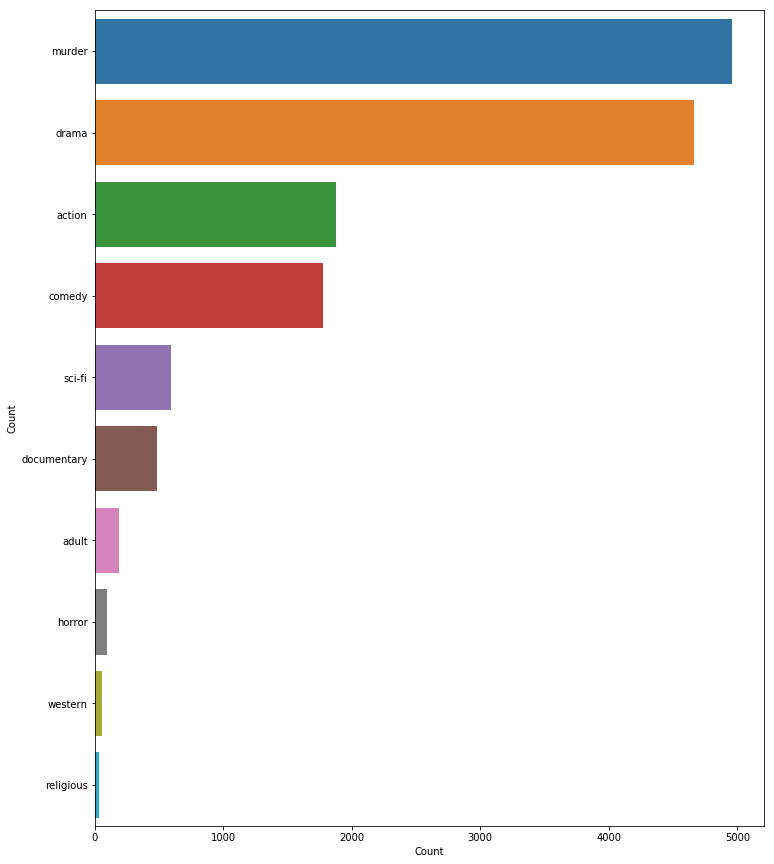

In [11]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [12]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [13]:
movies_new['clean_plot'] = movies_new['plot_synopsis'].apply(lambda x: clean_text(x))
movies_new.head()
movies_new.to_csv('movie_new_clean.csv', index=False) 

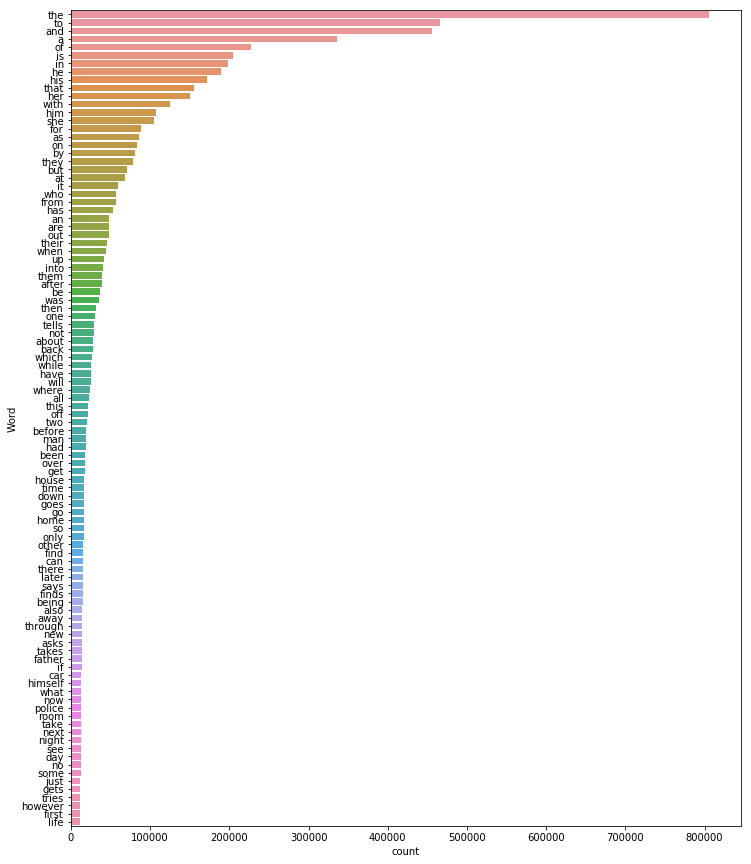

In [14]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(movies_new['clean_plot'], 100)

In [15]:
# nltk.download('stopwords')

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))

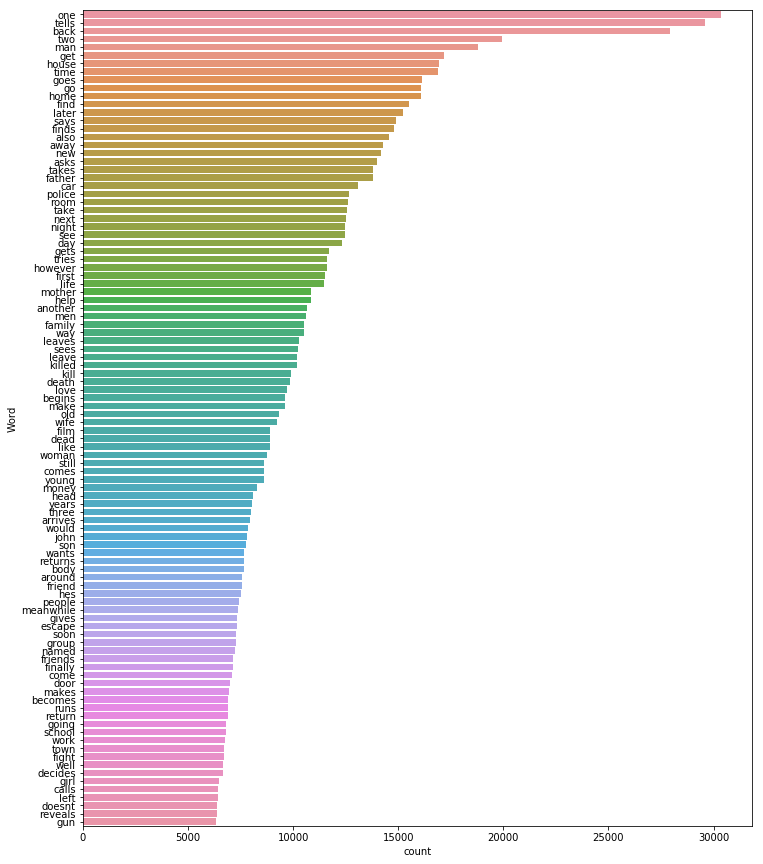

In [17]:
freq_words(movies_new['clean_plot'], 100)

## Create the MultiLabel Binarizer Model / One vs Rest Classifier

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_new['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(movies_new['genre_new'])
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

# create TF-IDF features
x_tfidf_fit = tfidf_vectorizer.fit(movies_new['clean_plot'])
x_tfidf = tfidf_vectorizer.transform(movies_new['clean_plot'])
# x_tfidf = x_tfidf.reshape(x_tfidf.shape[-1:])
# xval_tfidf = tfidf_vectorizer.transform(xval)
x_tfidf

<14750x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3712617 stored elements in Compressed Sparse Row format>

In [20]:
# split dataset into training and validation set.  The X/Feature is the "Clean plot" and the Y/Target is the Genre_new fields.
xtrain, xval, ytrain, yval = train_test_split(x_tfidf, y,  random_state=9)
print(xtrain.shape, ytrain.shape)

(11062, 10000) (11062, 10)


In [21]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [22]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [23]:
# fit model on train data
clf.fit(xtrain, ytrain)

C:\Users\aa11717\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [24]:
# make predictions for validation set
y_pred = clf.predict(xval)

In [30]:
y_pred[0:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [26]:
multilabel_binarizer.inverse_transform(y_pred)[0]

()

In [27]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.22168989547038329

In [28]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval)

In [29]:
[[max(ii, max_ii) for ii in y_pred_prob[0:5]

array([[0.07886291, 0.01245713, 0.07767082, 0.02826232, 0.31063017,
        0.0061673 , 0.44366879, 0.00273699, 0.02958245, 0.00783492],
       [0.11499931, 0.01880064, 0.09504947, 0.02274455, 0.20045035,
        0.00648236, 0.50091324, 0.00266007, 0.02828416, 0.00412766],
       [0.1316971 , 0.02769998, 0.10096298, 0.01408043, 0.1180951 ,
        0.00907658, 0.56175812, 0.0020605 , 0.02689803, 0.00370812],
       [0.2746004 , 0.00858283, 0.08172372, 0.03356732, 0.15820498,
        0.00581277, 0.42301751, 0.00229851, 0.03900293, 0.00398103],
       [0.08772343, 0.00894529, 0.12979519, 0.03781502, 0.19332852,
        0.00603281, 0.51774037, 0.00231074, 0.03679312, 0.00331717]])

In [39]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [40]:
y_pred_new[0:5]

array([[0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [32]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.4357189757058437

In [33]:
# multilabel_binarizer.inverse_transform(y_pred)

## Save the Model

In [34]:
# Save the model using pickle vs the h5 in neural networks
# model.save("movie_genrepredict.h5")
import pickle
from sklearn.externals import joblib
# save the model to disk
modelname = 'movie_genrepredict.sav'
pickle.dump(clf, open(modelname, 'wb'))

# joblib.dump(clf,'movie_genrepredict.pkl')
transformname = 'movie_genretranformpredict.sav'
pickle.dump(tfidf_vectorizer, open(transformname, 'wb'))

multiname = 'movie_genreyvaluepredict.sav'
pickle.dump(multilabel_binarizer, open(multiname, 'wb'))

## Import the model and Score it

In [35]:
# Load the model
# from tensorflow.keras.models import load_model
# model = load_model("movie_trained.h5")

# load the model from disk
# filename = 'movie_genrepredict.sav'
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(xval, yval) ## Performing the score on the test data
# print(result)

## MultiLabel Binarizer Predict Movie

In [50]:
def infer_tags(q):
    q = clean_text(q) ## Defined function for clean
    q = remove_stopwords(q) ## Defined function for removing stop words
    q_vec = tfidf_vectorizer.transform([q]) ##create TF-IDF features 
    q_pred = clf.predict(q_vec) ## The models predict.
    return multilabel_binarizer.inverse_transform(q_pred)

def infer_tags_prob(q, t=0.3):
    q = clean_text(q) ## Defined function for clean
    q = remove_stopwords(q) ## Defined function for removing stop words
    q_vec = tfidf_vectorizer.transform([q]) ##create TF-IDF features 
    q_pred = clf.predict_proba(q_vec) ## The models predict.
    q_pred_new = (q_pred >= t).astype(int)
    return multilabel_binarizer.inverse_transform(q_pred_new)

In [55]:
', '.join(infer_tags_prob(k)[0])

'drama, murder'

In [54]:
k = "This food was absolutely the worst thing I have ever eaten, stomach thought I was eating Taco Bell and tongue thought I was eating dirt."
print("Predicted genre: ", infer_tags(k))

Predicted genre:  [()]


In [47]:
for i in range(100):  ## Prediction made on 100 samples from Test in test train split.
    k = clf.predict(xval[i])
    l = multilabel_binarizer.inverse_transform(k)
#     print(l)
    print("Movie: ", movies_new['title'][i], "\nPredicted genre: ", (l)), print("Actual genre: ",movies_new['genre_new'][i], "\n")
#     print("Movie: ", movies_new['title'][i])
#     print("Predicted genre: ", (l))
#    print("Actual genre: ",movies_new['genre_new'][i])

Movie:  I tre volti della paura 
Predicted genre:  [()]
Actual genre:  ['murder'] 

Movie:  Dungeons & Dragons: The Book of Vile Darkness 
Predicted genre:  [('murder',)]
Actual genre:  ['murder'] 

Movie:  The Shop Around the Corner 
Predicted genre:  [('murder',)]
Actual genre:  ['drama'] 

Movie:  Mr. Holland's Opus 
Predicted genre:  [()]
Actual genre:  ['drama'] 

Movie:  Scarface 
Predicted genre:  [('murder',)]
Actual genre:  ['murder'] 

Movie:  A Single Man 
Predicted genre:  [('murder',)]
Actual genre:  ['drama'] 

Movie:  Baise-moi 
Predicted genre:  [()]
Actual genre:  ['drama'] 

Movie:  Flightplan 
Predicted genre:  [()]
Actual genre:  ['sci-fi'] 

Movie:  Little Caesar 
Predicted genre:  [()]
Actual genre:  ['murder'] 

Movie:  Savages 
Predicted genre:  [()]
Actual genre:  ['action'] 

Movie:  Mitt liv som hund 
Predicted genre:  [()]
Actual genre:  ['murder'] 

Movie:  The Brood 
Predicted genre:  [('murder',)]
Actual genre:  ['murder'] 

Movie:  Cassandra's Dream 
Pre

In [ ]:
# Shows the sample plot from the test data and will generated random sample:
# k = xval.sample(1)
# print(k)

In [ ]:
# Manually create the prediction based on the index value from previous cell (from random sample test):
# k = xval.sample(1).index[0] ## Looking for the index value in the test sample.
# print(infer_tags(xval[2786]))

## Create Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
### numpy for seed.  Good practice for reproducibility, not something we touched on but worth wild to look further.
import numpy as np
from numpy import random

SEED = 1234

random.seed(SEED)

clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=SEED).fit(xtrain, ytrain)
y_pred = clf.predict(xval)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# confusion_matrix(yval, y_pred)
print("Accuracy of base model is {:.2f} %".format(accuracy_score(yval, y_pred)*100))

In [ ]:
# Example from Roberts NLP:

# review = "This food was absolutely the worst thing I have ever eaten, stomach thought I was eating Taco Bell and tongue thought I was eating dirt."
# Will need to pass in the followoing columsn:  imdb_id, title, plot_synopsis, tags, split, synopsis_source, genre_new, clean_plot

### Transform Review
# review_transformed = tf.transform([review])

### Make Prediction
# pred = clf.predict(review_transformed)

### Using the defined `class_names` get the predicted Polarity ( negative/positive )
# print("Review was {}".format(class_names[pred[0]]))

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xtrain, ytrain)
print(clf)

In [ ]:
# Need to have graphviz installed on machine and the pip install
# import graphviz 
# dot_data = tree.export_graphviz(
#     clf, out_file=None, 
#     feature_names=xval.feature_names,  
#     class_names=yval.target_names,  
#     filled=True, rounded=True,  
#     special_characters=True)  

# import pydotplus
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('iris.png')

# graph = graphviz.Source(dot_data)  
# graph 

## Create Gridsearch Model

In [ ]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
xtrain.shape

In [ ]:
ytrain[0:5]

In [ ]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(xtrain, ytrain)

In [ ]:
# List the best parameters for this dataset
print(grid.best_params_)

In [ ]:
# List the best score
print(grid.best_score_)

In [ ]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

In [ ]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

## Create KNN (Next Nearest Neighbor) Model

k: 1, Train/Test Score: 0.965/0.286
k: 3, Train/Test Score: 0.474/0.213
k: 5, Train/Test Score: 0.332/0.183
k: 7, Train/Test Score: 0.262/0.159
k: 9, Train/Test Score: 0.214/0.132
k: 11, Train/Test Score: 0.182/0.118
k: 13, Train/Test Score: 0.154/0.108
k: 15, Train/Test Score: 0.137/0.095
k: 17, Train/Test Score: 0.126/0.089
k: 19, Train/Test Score: 0.113/0.084
k: 21, Train/Test Score: 0.105/0.075
k: 23, Train/Test Score: 0.100/0.076
k: 25, Train/Test Score: 0.090/0.068
k: 27, Train/Test Score: 0.085/0.065
k: 29, Train/Test Score: 0.078/0.064
k: 31, Train/Test Score: 0.074/0.062
k: 33, Train/Test Score: 0.072/0.057
k: 35, Train/Test Score: 0.067/0.053
k: 37, Train/Test Score: 0.063/0.050
k: 39, Train/Test Score: 0.061/0.050
k: 41, Train/Test Score: 0.059/0.045
k: 43, Train/Test Score: 0.055/0.043
k: 45, Train/Test Score: 0.053/0.039
k: 47, Train/Test Score: 0.049/0.037
k: 49, Train/Test Score: 0.048/0.033


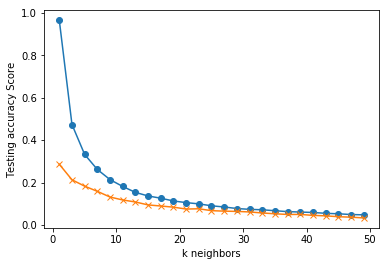

In [56]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    train_score = knn.score(xtrain, ytrain)
    test_score = knn.score(xval, yval)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(xtrain, ytrain)
print('k=30 Test Acc: %.3f' % knn.score(xval, yval))